# Logistic Regresion KNN

In [4]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

In [2]:
df= pd.read_csv('Logistic_Regression.csv')
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
sl_no             215 non-null int64
gender            215 non-null object
ssc_p             215 non-null float64
ssc_b             215 non-null object
hsc_p             215 non-null float64
hsc_b             215 non-null object
hsc_s             215 non-null object
degree_p          215 non-null float64
degree_t          215 non-null object
workex            215 non-null object
etest_p           215 non-null float64
specialisation    215 non-null object
mba_p             215 non-null float64
status            215 non-null object
salary            148 non-null float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


# Missing Values

In [4]:
df.isnull().sum()*100/df.shape[0]

sl_no              0.000000
gender             0.000000
ssc_p              0.000000
ssc_b              0.000000
hsc_p              0.000000
hsc_b              0.000000
hsc_s              0.000000
degree_p           0.000000
degree_t           0.000000
workex             0.000000
etest_p            0.000000
specialisation     0.000000
mba_p              0.000000
status             0.000000
salary            31.162791
dtype: float64

In [5]:
df['salary'].fillna(df['salary'].mean(),inplace =True)

In [6]:
df.isnull().sum()*100/df.shape[0]

sl_no             0.0
gender            0.0
ssc_p             0.0
ssc_b             0.0
hsc_p             0.0
hsc_b             0.0
hsc_s             0.0
degree_p          0.0
degree_t          0.0
workex            0.0
etest_p           0.0
specialisation    0.0
mba_p             0.0
status            0.0
salary            0.0
dtype: float64

In [7]:
listem= ['ssc_b',"hsc_b","hsc_s","degree_t","workex","specialisation","status"]
for i in listem:
    print(i+ '\n',df[i].unique())

ssc_b
 ['Others' 'Central']
hsc_b
 ['Others' 'Central']
hsc_s
 ['Commerce' 'Science' 'Arts']
degree_t
 ['Sci&Tech' 'Comm&Mgmt' 'Others']
workex
 ['No' 'Yes']
specialisation
 ['Mkt&HR' 'Mkt&Fin']
status
 ['Placed' 'Not Placed']


In [8]:
df['status'].replace({'Placed':1,'Not Placed':0},inplace=True)

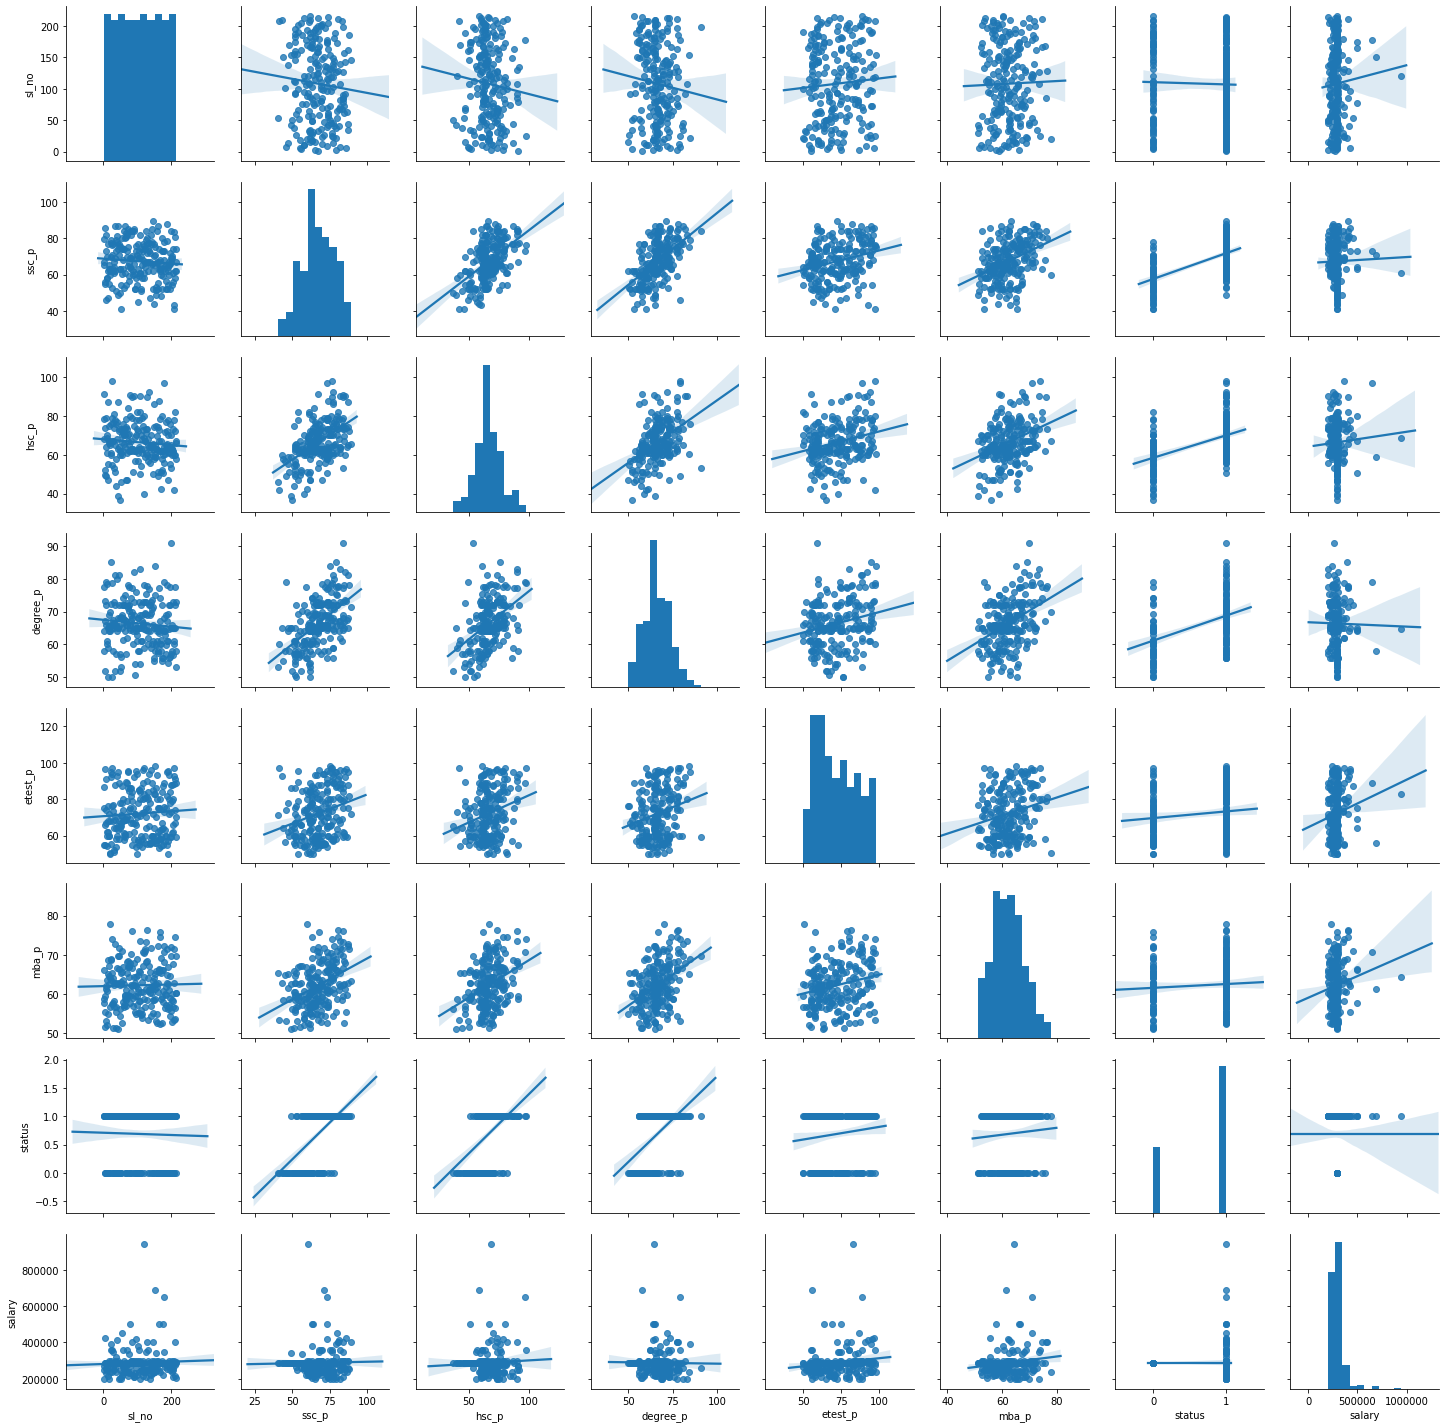

In [9]:
import seaborn as sns
sns.pairplot(df,kind="reg")

In [10]:
df_corr= df.corr()
df_corr

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,status,salary
sl_no,1.000000,-0.078155,-0.085711,-0.088281,0.063636,0.022327,-2.685942e-02,5.155040e-02
ssc_p,-0.078155,1.000000,0.511472,0.538404,0.261993,0.388478,6.078887e-01,2.357072e-02
hsc_p,-0.085711,0.511472,1.000000,0.434206,0.245113,0.354823,4.912279e-01,5.450558e-02
degree_p,-0.088281,0.538404,0.434206,1.000000,0.224470,0.402364,4.798610e-01,-1.414817e-02
etest_p,0.063636,0.261993,0.245113,0.224470,1.000000,0.218055,1.276394e-01,1.528286e-01
mba_p,0.022327,0.388478,0.354823,0.402364,0.218055,1.000000,7.692165e-02,1.463245e-01
status,-0.026859,0.607889,0.491228,0.479861,0.127639,0.076922,1.000000e+00,9.450535e-17
salary,0.051550,0.023571,0.054506,-0.014148,0.152829,0.146324,9.450535e-17,1.000000e+00


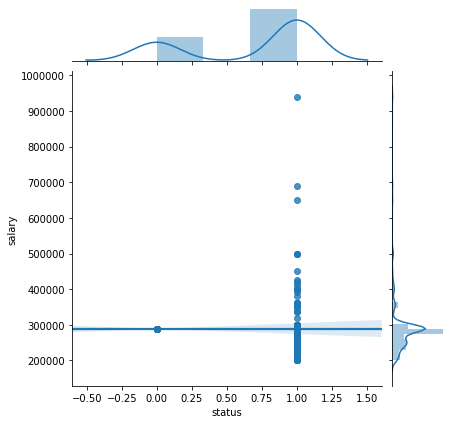

In [11]:
sns.jointplot(x='status', y='salary', data= df , kind="reg")

In [12]:
df['status'].value_counts()

1    148
0     67
Name: status, dtype: int64

In [13]:
df["ssc_b"]= pd.get_dummies(df.ssc_b)
df["hsc_b"]= pd.get_dummies(df.hsc_b)
df["workex"]= df.workex.replace({'No':0,'Yes':1})
df["specialisation"]= pd.get_dummies(df.specialisation)
df["gender"]= pd.get_dummies(df.gender)
df["hsc_s"]= pd.get_dummies(df.hsc_s)
df["degree_t"]= pd.get_dummies(df.degree_t)

# Model Tuninig

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

In [15]:
y = df['status']
X = df.drop('status', axis=1)

In [16]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_scl=scaler.fit_transform(X)

In [17]:
from sklearn.linear_model import LogisticRegression
logistic=LogisticRegression()

parameters = {"C": [10 ** x for x in range (-5, 5, 1)],
                "penalty": ['l1', 'l2'],'solver': ('linear', 'lbfgs', 'liblinear')}

In [18]:
from sklearn.model_selection import GridSearchCV
grid_cv = GridSearchCV(estimator=logistic,
                       param_grid = parameters,
                       cv = 10)
grid_cv.fit(X, y)
print("The best parameters : ", grid_cv.best_params_)
print("The best score         : ", grid_cv.best_score_)

The best parameters :  {'C': 1000, 'penalty': 'l1', 'solver': 'liblinear'}
The best score         :  0.8653679653679653


In [19]:
def create_model(X,y,tip):
    X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.20, random_state=111, stratify = y)
    logistic = LogisticRegression(solver='liblinear',penalty='l1',C=1000)
    logistic.fit(X_train, y_train)
    
    prediction_train=logistic.predict(X_train)
    prediction_test=logistic.predict(X_test)
    
    prediction_test_prob = logistic.predict_proba(X_test)[:,1]
    
    d = pd.Series({'Accuracy_Train':accuracy_score(y_train,prediction_train),
                   'Precision_Train':precision_score(y_train,prediction_train),
                   'Recall_Train':recall_score(y_train,prediction_train),
                   'F1 Score_Train':f1_score(y_train,prediction_train),
                   'Accuracy_Test':accuracy_score(y_test,prediction_test),
                   'Precision_Test':precision_score(y_test,prediction_test),
                   'Recall_Test':recall_score(y_test,prediction_test),
                   'F1 Score_Test':f1_score(y_test,prediction_test),
                   'AUC Score':roc_auc_score(y_test, prediction_test_prob)},name=tip)
    return d

In [20]:
metrics=pd.DataFrame()
metrics=metrics.append(create_model(X_scl,y,tip='Logistic_Regr.'))
metrics

,AUC Score,Accuracy_Test,Accuracy_Train,F1 Score_Test,F1 Score_Train,Precision_Test,Precision_Train,Recall_Test,Recall_Train
Logistic_Regr.,0.974359,0.953488,0.872093,0.966667,0.908333,0.966667,0.893443,0.966667,0.923729


# Cross Validation

In [21]:
from sklearn.model_selection import cross_validate, cross_val_score

lrm = LogisticRegression(solver='liblinear',penalty='l1',C=0.1)
cv = cross_validate(estimator=lrm,
                     X=X_scl,
                     y=y,
                     cv=10,return_train_score=True
                    )
print('Test Scores            : ', cv['test_score'], sep = '\n')
print("-"*50)
print('Train Scores          : ', cv['train_score'], sep = '\n')

Test Scores            : 
[0.81818182 0.81818182 0.81818182 0.77272727 0.86363636 0.9047619
 0.9047619  0.80952381 0.80952381 0.76190476]
--------------------------------------------------
Train Scores          : 
[0.84974093 0.87046632 0.85492228 0.85492228 0.85492228 0.86082474
 0.84536082 0.8556701  0.8556701  0.86597938]


In [22]:
print('Mean of Test Sets : ', cv['test_score'].mean())
print('Mean of Train Sets : ', cv['train_score'].mean())

Mean of Test Sets :  0.8281385281385282
Mean of Train Sets :  0.8568479247903424


# K-Nearest Neighbour Algorithm

In [23]:
y = df['status']
X = df.drop('status', axis=1)

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_scl=scaler.fit_transform(X)
X_train, X_test, y_train, y_test =  train_test_split(X_scl,y, test_size=0.20, random_state=40, stratify = y)

In [25]:
from sklearn.neighbors import KNeighborsClassifier
Knn=KNeighborsClassifier(n_neighbors=5)
Knn.fit(X_train,y_train)

KNeighborsClassifier()

In [26]:
test_preds=Knn.predict(X_test)
y_probs=Knn.predict_proba(X_test)[:,1]

In [27]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, roc_auc_score
def metric(x,y):
    print("Precision Score: {}".format(precision_score(x,y)))
    print('Recall Score   : {}'.format(recall_score(x,y)))
    print("Accuracy Score : {}".format(accuracy_score(x,y)))
    print("F1 Score       : {}".format(f1_score(x,y)))
metric(y_test,test_preds)
print("AUC Score      : {}".format(roc_auc_score(y_test,y_probs)))

Precision Score: 0.8181818181818182
Recall Score   : 0.9
Accuracy Score : 0.7906976744186046
F1 Score       : 0.8571428571428572
AUC Score      : 0.8423076923076923


In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
Knn=KNeighborsClassifier()
k_range = list(range(1,25))
parameter = dict(n_neighbors=k_range)
grid = GridSearchCV(Knn, parameter, cv=10, scoring='roc_auc')
Grds = grid.fit(X,y)
print('The best parameters:', Grds.best_estimator_)
print('The best score:', Grds.best_score_)

The best parameters: KNeighborsClassifier(n_neighbors=1)
The best score: 0.993095238095238


# KNN Regresion 

In [5]:
import pandas as pd 
df= pd.read_csv('Linear_Regression.csv')
df.drop('Unnamed: 0',axis=1 , inplace=True)
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [6]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm 

X= df.drop('sales',axis=1)
y=df.sales

X_train , X_test , y_train , y_test = train_test_split(X,y, test_size=0.2 , random_state= 40 )

X_train = sm.add_constant(X_train)
result = sm.OLS(y_train, X_train).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     598.6
Date:                Wed, 17 Jun 2020   Prob (F-statistic):           2.48e-85
Time:                        17:48:33   Log-Likelihood:                -288.50
No. Observations:                 160   AIC:                             585.0
Df Residuals:                     156   BIC:                             597.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.2572      0.299     10.906      0.000       2.667       3.847
TV             0.0440      0.001     31.330      0.000       0.041       0.047
radio          0.1951      0.008     23.140      0.000       0.178       0.212
newspaper     -0.0035      0.006     -0.590      0.556      -0.015       0.008
==============================================================================
Omnibus:                       14.981   Durbin-Watson:                   1.873
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               16.537
Skew:                          -0.777   Prob(JB):                     0.000257
Kurtosis:                       3.256   Cond. No.                         436.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

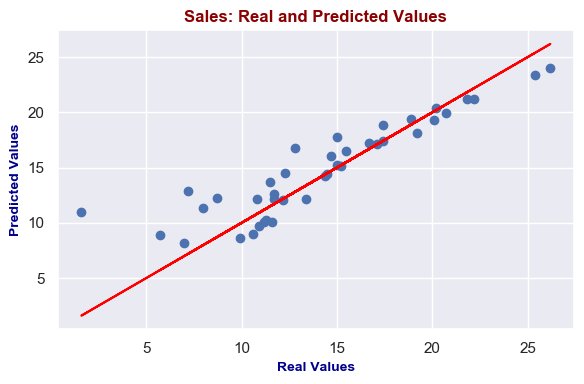

Root Mean Squared Error (RMSE)                : 2.355
Root Mean Squared Error (RMSE) of Train Set   : 1.468


In [7]:
from sklearn.metrics import mean_squared_error ,r2_score
from statsmodels.tools.eval_measures import mse, rmse
X_test = sm.add_constant(X_test)
y_preds = result.predict(X_test)
X_train= sm.add_constant(X_train)
y_preds_train = result.predict(X_train)

baslik_font = {'family': 'arial','color':  'darkred','weight': 'bold','size': 12 }
eksen_font = {'family': 'arial','color':  'darkblue','weight': 'bold','size': 10 }
plt.figure(dpi = 100)

sns.set(color_codes=True)
plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("Real Values", fontdict=eksen_font)
plt.ylabel("Predicted Values", fontdict=eksen_font)
plt.title("Sales: Real and Predicted Values", fontdict=baslik_font)
plt.tight_layout()
plt.show()

print("Root Mean Squared Error (RMSE)                : {:.3f}".format(rmse(y_test, y_preds)))
print("Root Mean Squared Error (RMSE) of Train Set   : {:.3f}".format(rmse(y_train, y_preds_train)))

# Scikit Learn Model

In [8]:
from sklearn.linear_model import LinearRegression

X= df.drop('sales',axis=1)
y=df.sales

X_train , X_test , y_train , y_test = train_test_split(X,y, test_size=0.2 , random_state= 40 )

lm = LinearRegression()
result = lm.fit(X_train, y_train)

In [9]:
from sklearn.model_selection import train_test_split, cross_val_score ,cross_val_predict
cross_val_score(result, X , y , cv= 10, scoring="r2").mean() # Rsquared 

0.8853562237979616

In [10]:
np.sqrt(-cross_val_score(result, X_train , y_train , cv= 10, scoring="neg_mean_squared_error")).mean() # Train Errors -- RMSE VALUES -- 

1.4939738053806084

In [11]:
np.sqrt(-cross_val_score(result, X_test , y_test , cv= 10, scoring="neg_mean_squared_error")).mean() # Test Errors -- RMSE VALUES --  

2.107250748030921

# KNN Model

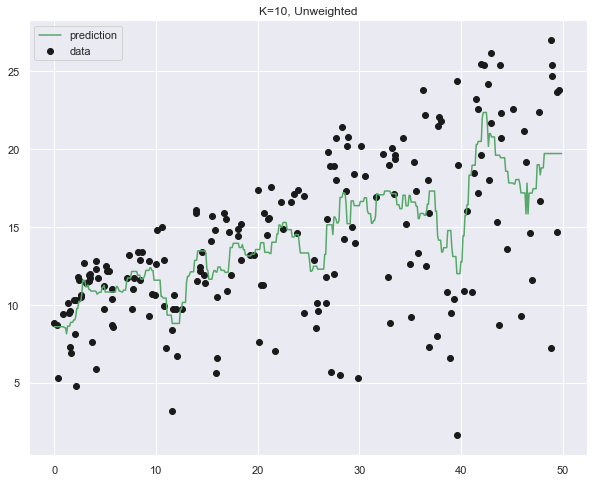

In [12]:
from sklearn import neighbors

# Build our model.
knn = neighbors.KNeighborsRegressor(n_neighbors=10)
X = pd.DataFrame(df.radio)
y = df.sales
knn.fit(X, y)

# Set up our prediction line.
T = np.arange(0, 50, 0.1)[:, np.newaxis]

# Trailing underscores are a common convention for a prediction.
Y_ = knn.predict(T)
plt.figure(figsize=(10,8))
plt.scatter(X, y, c='k', label='data')
plt.plot(T, Y_, c='g', label='prediction')
plt.legend()
plt.title('K=10, Unweighted')
plt.show()

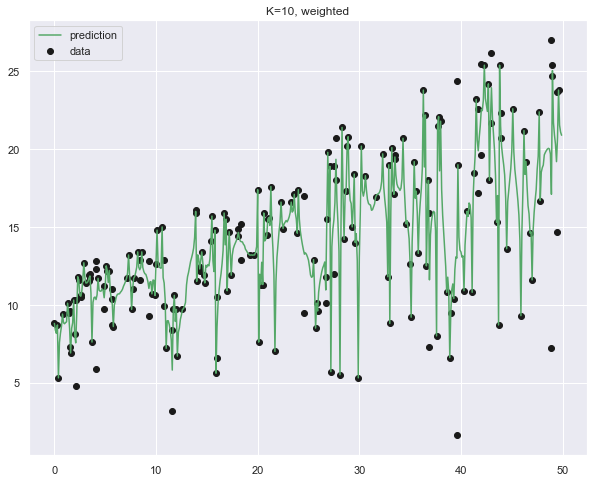

In [15]:
# Build our model.
knn_w = neighbors.KNeighborsRegressor(n_neighbors=10, weights='distance')
X = pd.DataFrame(df.radio)
y = df.sales
knn.fit(X, y)

# Set up our prediction line.
T = np.arange(0, 50, 0.1)[:, np.newaxis]

# Trailing underscores are a common convention for a prediction.
Y_ = knn.predict(T)
plt.figure(figsize=(10,8))
plt.scatter(X, y, c='k', label='data')
plt.plot(T, Y_, c='g', label='prediction')
plt.legend()
plt.title('K=10, weighted')
plt.show()

In [16]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(knn, X, y, cv=5)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
score_w = cross_val_score(knn_w, X, y, cv=5)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))

Unweighted Accuracy: -0.05 (+/- 0.68)
Weighted Accuracy: -0.05 (+/- 0.68)


In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
Knn=neighbors.KNeighborsRegressor()
k_range = list(range(1,25))
parameter = dict(n_neighbors=k_range)
grid = GridSearchCV(Knn, parameter, cv=10, scoring='r2')
Grds = grid.fit(X,y)
print('The best parameters:', Grds.best_estimator_)
print('The best score:', Grds.best_score_)

The best parameters: KNeighborsRegressor(n_neighbors=13)
The best score: 0.2956709453299836


In [18]:
metrics= pd.DataFrame()
metrics['radio']=Grds.best_estimator_,Grds.best_score_

# For TV

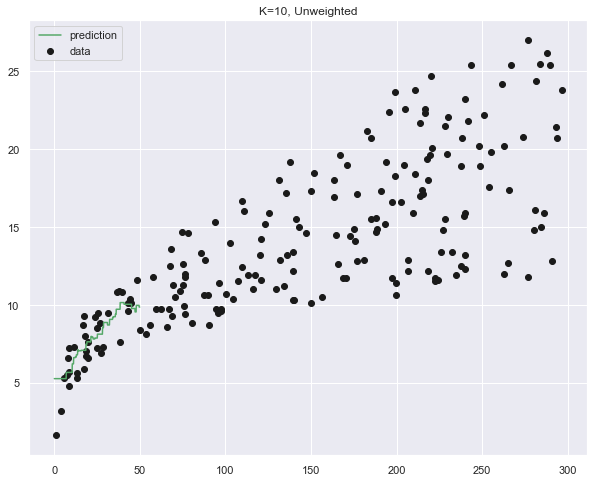

In [19]:
# Build our model.
knn = neighbors.KNeighborsRegressor(n_neighbors=10)
X = pd.DataFrame(df.TV)
y = df.sales
knn.fit(X, y)

# Set up our prediction line.
T = np.arange(0, 50, 0.1)[:, np.newaxis]

# Trailing underscores are a common convention for a prediction.
Y_ = knn.predict(T)
plt.figure(figsize=(10,8))
plt.scatter(X, y, c='k', label='data')
plt.plot(T, Y_, c='g', label='prediction')
plt.legend()
plt.title('K=10, Unweighted')
plt.show()

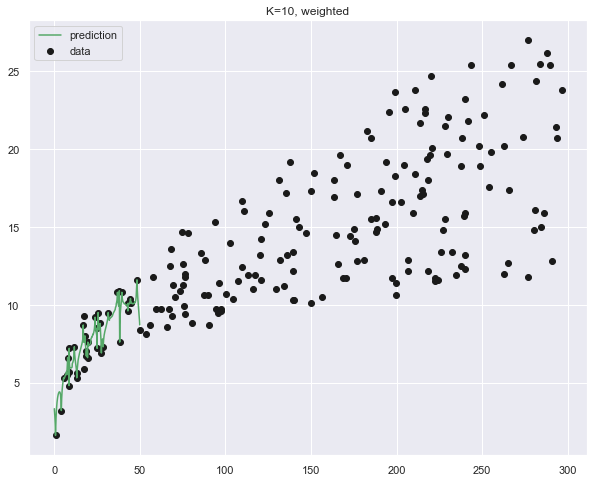

In [27]:
knn = neighbors.KNeighborsRegressor(n_neighbors=10, weights='distance')
X = pd.DataFrame(df.TV)
y = df.sales
knn.fit(X, y)

# Set up our prediction line.
T = np.arange(0, 50, 0.1)[:, np.newaxis]

# Trailing underscores are a common convention for a prediction.
Y_ = knn.predict(T)
plt.figure(figsize=(10,8))
plt.scatter(X, y, c='k', label='data')
plt.plot(T, Y_, c='g', label='prediction')
plt.legend()
plt.title('K=10, weighted')
plt.show()

In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
Knn=neighbors.KNeighborsRegressor()
k_range = list(range(1,25))
parameter = dict(n_neighbors=k_range)
grid = GridSearchCV(Knn, parameter, cv=10, scoring='r2')
Grds = grid.fit(X,y)
print('The best parameters:', Grds.best_estimator_)
print('The best score:', Grds.best_score_)

The best parameters: KNeighborsRegressor(n_neighbors=19)
The best score: 0.5655836455704475


In [22]:
metrics['TV']=Grds.best_estimator_,Grds.best_score_

# For Newspaper

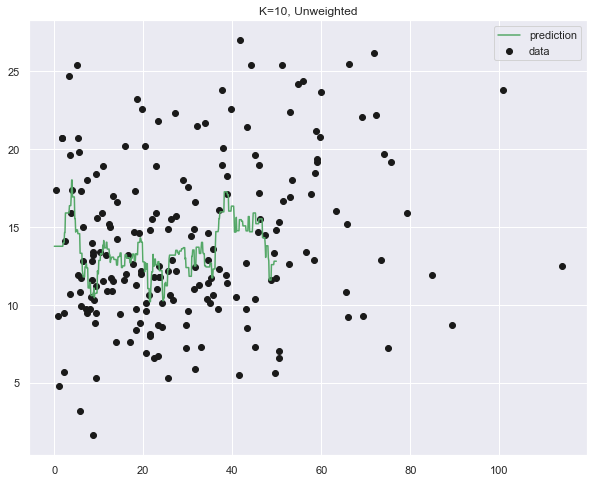

In [28]:
# Build our model.
knn = neighbors.KNeighborsRegressor(n_neighbors=10)
X = pd.DataFrame(df.newspaper)
y = df.sales
knn.fit(X, y)

# Set up our prediction line.
T = np.arange(0, 50, 0.1)[:, np.newaxis]

# Trailing underscores are a common convention for a prediction.
Y_ = knn.predict(T)
plt.figure(figsize=(10,8))
plt.scatter(X, y, c='k', label='data')
plt.plot(T, Y_, c='g', label='prediction')
plt.legend()
plt.title('K=10, Unweighted')
plt.show()

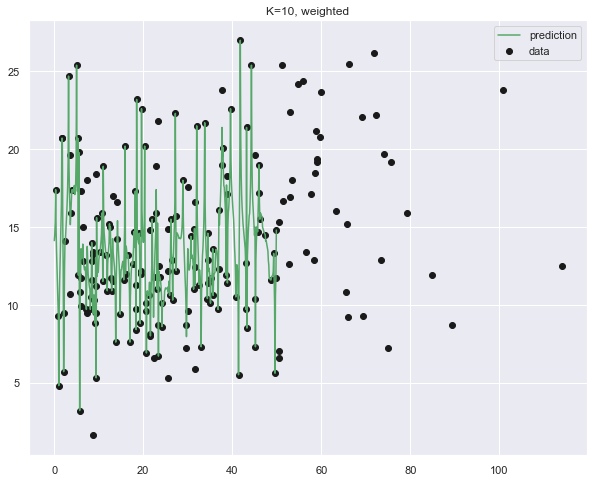

In [30]:
knn = neighbors.KNeighborsRegressor(n_neighbors=10, weights='distance')
X = pd.DataFrame(df.newspaper)
y = df.sales
knn.fit(X, y)

# Set up our prediction line.
T = np.arange(0, 50, 0.1)[:, np.newaxis]

# Trailing underscores are a common convention for a prediction.
Y_ = knn.predict(T)
plt.figure(figsize=(10,8))
plt.scatter(X, y, c='k', label='data')
plt.plot(T, Y_, c='g', label='prediction')
plt.legend()
plt.title('K=10, weighted')
plt.show()

In [31]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
Knn=neighbors.KNeighborsRegressor()
k_range = list(range(1,25))
parameter = dict(n_neighbors=k_range)
grid = GridSearchCV(Knn, parameter, cv=10, scoring='r2')
Grds = grid.fit(X,y)
print('The best parameters:', Grds.best_estimator_)
print('The best score:', Grds.best_score_)

The best parameters: KNeighborsRegressor(n_neighbors=24)
The best score: 0.00042205473726698585


In [32]:
metrics['newspaper']=Grds.best_estimator_,Grds.best_score_

In [33]:
metrics

,radio,TV,newspaper
0,KNeighborsRegressor(n_neighbors=13),KNeighborsRegressor(n_neighbors=19),KNeighborsRegressor(n_neighbors=24)
1,0.295671,0.565584,0.000422055
